In [12]:
from keras.datasets import mnist
from keras.layers import Flatten, Activation
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import Conv2D
from keras.layers import MaxPool2D, AvgPool2D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.load('small_dataset.npy')
labels=np.load('labels.npy').astype(np.int)
blabels = labels.astype(bool)
pos_data = data[[blabels]]
pos_labels = labels[[blabels]]
neg_data = data[[(blabels*-1+1).astype(bool)]][:pos_data.shape[0]]
neg_labels = np.zeros((neg_data.shape[0],))

In [3]:
data = np.stack([pos_data,neg_data]).reshape(-1,128,128)
labels = np.stack([pos_labels,neg_labels]).reshape(-1)

In [4]:
labels = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.20, random_state=42)

# I shuffle later
# data_train, labels_train = shuffle(data_train, labels_train)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

In [6]:

K.clear_session()

model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(128, 128, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), input_shape=(128, 128, 1)))
model.add(Conv2D(256, (3, 3), input_shape=(128, 128, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))



model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 128)     1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
activation_1 (Activation)    (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 59, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 256)       0         
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 256)       0         
__________

In [8]:
h= model.fit(X_train, y_train, shuffle=True, batch_size=128,
          epochs=5, verbose=1, validation_split=0.3,)

Train on 2096 samples, validate on 899 samples
Epoch 1/5
2096/2096 [==============================] - 692s - loss: 2.4763 - acc: 0.6603 - val_loss: 0.4968 - val_acc: 0.7653
Epoch 2/5
2096/2096 [==============================] - 689s - loss: 0.4495 - acc: 0.7810 - val_loss: 0.4650 - val_acc: 0.7686
Epoch 3/5
2096/2096 [==============================] - 665s - loss: 0.4552 - acc: 0.7863 - val_loss: 0.4739 - val_acc: 0.7775
Epoch 4/5
2096/2096 [==============================] - 672s - loss: 0.4403 - acc: 0.7872 - val_loss: 0.4585 - val_acc: 0.7786
Epoch 5/5
2096/2096 [==============================] - 691s - loss: 0.4397 - acc: 0.7906 - val_loss: 0.4571 - val_acc: 0.7798


In [9]:
model.evaluate(X_test, y_test)

749/749 [==============================] - 70s    


[0.46415808486524668, 0.78237650224140709]

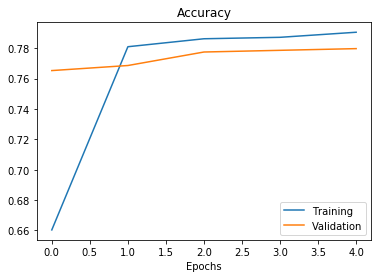

In [13]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [19]:
pred = model.predict_classes(X_test)

749/749 [==============================] - 70s    


In [24]:
pred.shape

(749,)

In [29]:
y = y_test[:,1]

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, pred)

array([[211, 149],
       [ 14, 375]])

In [31]:
sum(pred)

524

In [33]:
model.save("kerasv1.h5")